<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/above_50_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


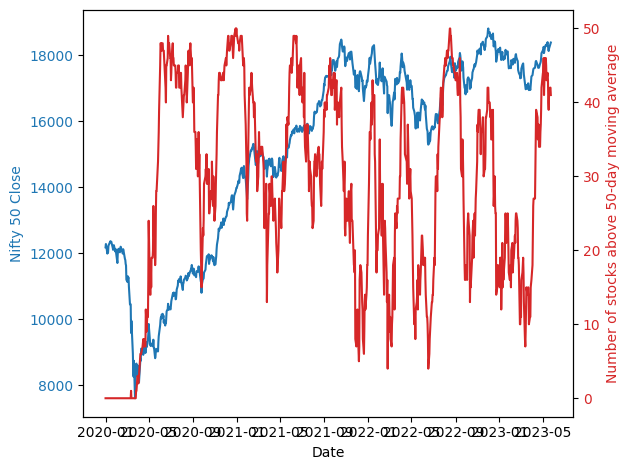

In [3]:
# Fetch Nifty 50 constituents
nifty50_url = "https://archives.nseindia.com/content/indices/ind_nifty50list.csv"
nifty50 = pd.read_csv(nifty50_url)
tickers = nifty50['Symbol'].apply(lambda x: x + ".NS").tolist()

# Fetch historical data
start_date = "2020-01-01"

data = yf.download(tickers, start=start_date)['Adj Close']

# Calculate the 50-day moving average
data_50d_mavg = data.rolling(window=50).mean()

# Check if stocks are trading above their 50-day moving average
above_50d_mavg = data > data_50d_mavg

# Count the number of stocks trading above their 50-day moving average
num_stocks_above_mavg = above_50d_mavg.sum(axis=1)

# Fetch Nifty 50 index data
nifty50_data = yf.download("^NSEI", start=start_date)['Adj Close']

# Plot Nifty 50 close and the number of stocks trading above their 50-day moving average
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Number of stocks above 50-day moving average', color='tab:red')  
ax2.plot(num_stocks_above_mavg.index, num_stocks_above_mavg, color='tab:red', label='Stocks above 50-day MA')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.show()


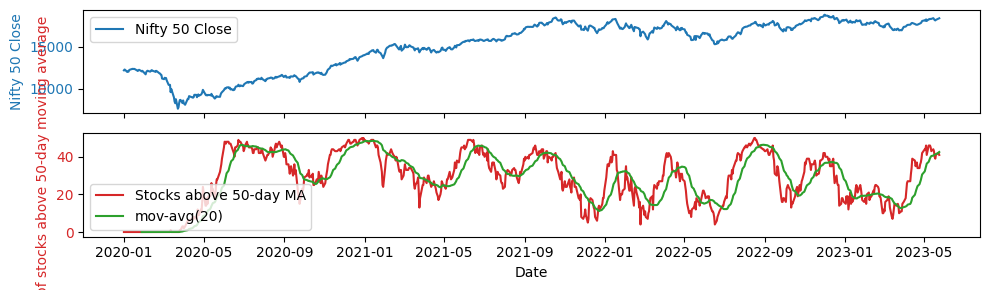

In [4]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,3), sharex=True)

# Plot Nifty 50 close on the first subplot
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend()

# Plot the number of stocks trading above their 50-day moving average on the second subplot
ax2.plot(num_stocks_above_mavg.index, num_stocks_above_mavg,color='tab:red', label='Stocks above 50-day MA')
ax2.plot(num_stocks_above_mavg.index,num_stocks_above_mavg.rolling(window=20).mean(),color='tab:green', label='mov-avg(20)')

ax2.set_xlabel('Date')
ax2.set_ylabel('Number of stocks above 50-day moving average', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend()

fig.tight_layout()
plt.show()


In [5]:
# Calculate the 20-day moving average
data_20d_mavg = data.rolling(window=20).mean()

# Check if stocks are trading above their 20-day moving average
above_20d_mavg = data > data_20d_mavg

# Count the number of stocks trading above their 20-day moving average
num_stocks_above_20mavg = above_20d_mavg.sum(axis=1)

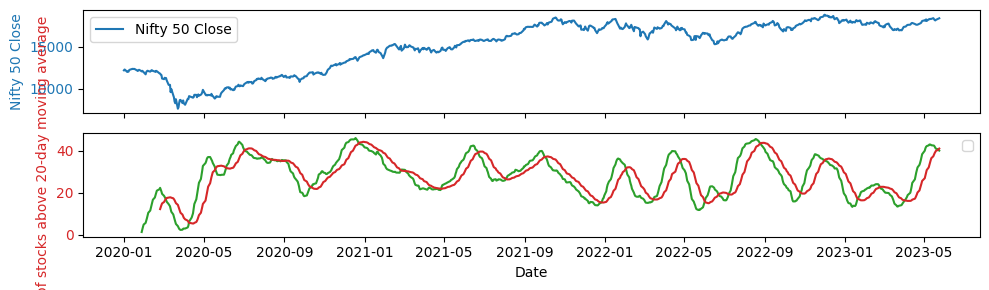

In [6]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,3), sharex=True)

# Plot Nifty 50 close on the first subplot
ax1.plot(nifty50_data.index, nifty50_data, color='tab:blue', label='Nifty 50 Close')
ax1.set_ylabel('Nifty 50 Close', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend()

# Plot the number of stocks trading above their 50-day moving average on the second subplot
ax2.plot(num_stocks_above_mavg.index,num_stocks_above_20mavg.rolling(window=20).mean(),color='tab:green', label='mov-avg')
ax2.plot(num_stocks_above_mavg.index,num_stocks_above_20mavg.rolling(window=20).mean().rolling(window=20).mean(),color='tab:red', label='mov-avg(5)')

ax2.set_xlabel('Date')
ax2.set_ylabel('Number of stocks above 20-day moving average', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend('')

fig.tight_layout()
plt.show()


In [7]:
nifty50_data.tail(2)

Date
2023-05-23    18348.0
2023-05-24    18387.0
Name: Adj Close, dtype: float64